# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [9]:
import numpy as np

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [12]:
for i in range(1, 41):
    print('Probek w klasie:', i, sum(train[:, 0] == i))

print('')

# alternatywna opcja: vstring
for i in range(1, 41):
    print(f'probek w klasie {i} jest {sum(train[:, 0] == i)}')

Probek w klasie: 1 77
Probek w klasie: 2 66
Probek w klasie: 3 55
Probek w klasie: 4 66
Probek w klasie: 5 77
Probek w klasie: 6 44
Probek w klasie: 7 44
Probek w klasie: 8 33
Probek w klasie: 9 121
Probek w klasie: 10 88
Probek w klasie: 11 88
Probek w klasie: 12 77
Probek w klasie: 13 99
Probek w klasie: 14 66
Probek w klasie: 15 66
Probek w klasie: 16 0
Probek w klasie: 17 0
Probek w klasie: 18 0
Probek w klasie: 19 0
Probek w klasie: 20 0
Probek w klasie: 21 0
Probek w klasie: 22 121
Probek w klasie: 23 77
Probek w klasie: 24 77
Probek w klasie: 25 66
Probek w klasie: 26 99
Probek w klasie: 27 55
Probek w klasie: 28 66
Probek w klasie: 29 110
Probek w klasie: 30 77
Probek w klasie: 31 77
Probek w klasie: 32 66
Probek w klasie: 33 66
Probek w klasie: 34 99
Probek w klasie: 35 88
Probek w klasie: 36 33
Probek w klasie: 37 0
Probek w klasie: 38 0
Probek w klasie: 39 0
Probek w klasie: 40 0

probek w klasie 1 jest 77
probek w klasie 2 jest 66
probek w klasie 3 jest 55
probek w klasie 4

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [15]:
klasy = [3,5]

train_new = train[ np.isin(train[:, 0 ], klasy) ]
test_new = test[ np.isin(test[:, 0 ], klasy) ]

# albo tak
train_new = train[ (train[:, 0] == 3) | (train[:, 0] == 5) ]
test_new = test[ (test[:, 0] == 3) | (test[:, 0] == 5) ]

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje moduł zawieracjący funkcje przydatne do wizualizacji danych z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples): # iteracja po grupach
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
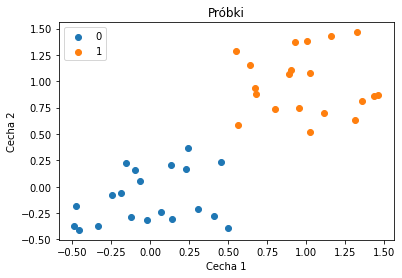

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

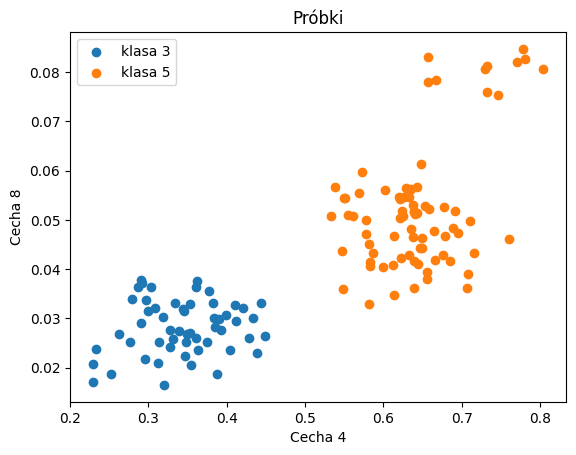

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")

for kl in [3, 5]:
    probki_kl = train[train[:, 0] == kl]
    x_kl = probki_kl[:, 4]
    y_kl = probki_kl[:, 8]
    plt.scatter(x_kl, y_kl, label=f'klasa {kl}')


# plt.scatter([1, 2, 3, 4], [5, 4, 3, 2])
# x_kl3 = probki_klasy_3[:, 4]
# y_kl3 = probki_klasy_3[:, 8]
# plt.scatter(x_kl3, y_kl3, label='klasa 3')

# x_kl5 = probki_klasy_5[:, 4]
# y_kl5 = probki_klasy_5[:, 8]
# plt.scatter(x_kl5, y_kl5, label='klasa 5')

plt.legend()

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `x` oraz `y` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [37]:
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

def edist(x, y, features):
     return sum([(x[i] - y[i])**2 for i in features])**0.5

edist(x, y, features) # wynik: 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [ ]:
for el in test:
    #znajdz najblizszy element z train
    #sprawdz klase najblizszego elementu
    #i dodaj na liste

    najblizszy = train[5]
    etykiety.append(najblizszy[0]) 

### Zadanie 7
Przeprowadź klasyfikację liści wybranych wcześniej (dwóch) klas korzystając z własnej implementacji modelu kNN, a następnie wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

In [ ]:
# <UZUPEŁNIJ>

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [ ]:
# <UZUPEŁNIJ>

### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.


In [ ]:
# <UZUPEŁNIJ>

### Zadanie 10

Przeprowadź eksperyment ponownie dla takich samych parametrów jak w zad. 9, ale większej losowo wybranej liczby cech: 3, 5, 10.

> W tym przypadku nie wyświetlaj wykresu a jedynie oblicz dokładność klasyfikacji.

In [ ]:
# <UZUPEŁNIJ>

### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

In [ ]:
"""
<TU NAPISZ WNIOSKI>

"""